In [1]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import shap

class LinearSHAPRegressor(BaseEstimator):
    def __init__(self, 
                 base_estimator=RandomForestRegressor(), 
                 shapvalue_estimator=LinearTreeRegressor(base_estimator=LinearRegression())):
        self.base_estimator = base_estimator
        self.shapvalue_estimator = shapvalue_estimator        
    
    def fit(self, X, y):
        self.base_estimator.fit(X,y)
        self.explainer = shap.TreeExplainer(model=self.base_estimator)        
        self.shap_values = self.explainer.shap_values(X=X)
        
        shap_values_models = []
        for each_X, shap_value in zip(X.T, self.shap_values.T):
            each_X = each_X.reshape(-1,1)
            each_ltr = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1)
            each_ltr.fit(each_X, shap_value)
            shap_values_models.append(each_ltr)
        self.shap_values_models = shap_values_models
        return self
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for idx, each_shap_value_model in enumerate(self.shap_values_models):
            each_pred_shap_value = each_shap_value_model.predict(X[:, idx].reshape(-1,1))
            y_pred += each_pred_shap_value
        
        shap_values_pred = self.explainer.shap_values(X=X)
        
        y_pred += shap_values_pred.sum(axis=1)
        return y_pred
        

In [2]:
import shap
import sklearn.datasets
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import make_regression

In [4]:
X, y, coef = make_regression(random_state=12, 
                       n_samples=100, 
                       n_features=4,
                       n_informative=2,
                       noise=10.0,
                       bias=-0.0,
                       coef=True)

In [5]:

X = np.random.normal(size=[1000,15])
X_test = np.random.normal(loc=[5,-3,3,3,3,2,3,3,3,3,3,3,3,3,-3],scale=[1,2,0.5,1,1,1,1,1,1,1,1,1,1,1,1],size=[100,15]) # .reshape(3,30)
'''
cov =[[1,0.5,0.3], [0.5,2,0.5], [0.3, 0.5,1.1]]
mean = [0,0,0]
mean_test = [0,-3,3]
X = np.random.multivariate_normal(mean, cov, size=1000)
X_test = np.random.multivariate_normal(mean_test, cov, size=1000)
# X_test = np.random.multivariate_normal(loc=[0,-3,3],scale=[1,2,0.5],size=[1000,3]) # .reshape(3,30)
'''
print(X.shape)

X_sc = StandardScaler()
X_std = X_sc.fit_transform(X)
X_test_std = X_sc.transform(X_test)


(1000, 15)


In [6]:
import random
def calculate(X):
    random.seed(0)    
    y_0 = np.where(X[:,0] > 0.25, np.random.normal(scale=0.2, size=X[:,0].shape), X[:,0]*0.5 + np.random.normal(scale=0.1,size=X[:,0].shape) - 0.125)  
    y_1 = np.where(X[:,1] < -0,np.random.normal(scale=0.3, size=X[:,1].shape), X[:,1]*(-1)+ np.random.normal(scale=0.1,size=X[:,1].shape) - 0.5)
    y_2 = np.where(X[:,2] < -0.75,np.random.normal(scale=0.1, size=X[:,2].shape), X[:,2]*1.0 + np.random.normal(scale=0.1,size=X[:,2].shape) + 0.75)
    y_3 = np.where(X[:,3] < -0.75,np.random.normal(scale=0.1, size=X[:,3].shape), X[:,3]*2.0 + np.random.normal(scale=0.1,size=X[:,2].shape) + 1.5)
    y_4 = np.where(X[:,4] < 0,np.random.normal(scale=0.1, size=X[:,4].shape), X[:,4]*0.3 + np.random.normal(scale=0.1,size=X[:,2].shape) + 0.3)
    y_5 = np.where(X[:,5] < -0.3,np.random.normal(scale=0.1, size=X[:,5].shape), X[:,5]*0.7 + np.random.normal(scale=0.1,size=X[:,2].shape) + 0.7)
    y_6 = np.where(X[:,6] < 0.25,np.random.normal(scale=0.1, size=X[:,6].shape), X[:,6]*(-1.0) + np.random.normal(scale=0.1,size=X[:,2].shape)-1)
    y_7 = np.where(X[:,7] < 0,np.random.normal(scale=0.1, size=X[:,7].shape), X[:,7]*1.2 + np.random.normal(scale=0.1,size=X[:,2].shape) + 1.2)
    y_8 = np.where(X[:,8] < 0.5,np.random.normal(scale=0.1, size=X[:,8].shape), X[:,8]*(-0.14) + np.random.normal(scale=0.1,size=X[:,2].shape) - 0.14)
    y_9 = np.where(X[:,9] < 0.0,np.random.normal(scale=0.1, size=X[:,9].shape), X[:,9]*1.1 + np.random.normal(scale=0.1,size=X[:,2].shape) + 1.1)
    y_10 = np.where(X[:,10] < -1,np.random.normal(scale=0.01, size=X[:,10].shape), X[:,10]*0.1 + np.random.normal(scale=0.1,size=X[:,2].shape) -0.1)
    y_11 = np.where(X[:,11] > 0,np.random.normal(scale=0.1, size=X[:,11].shape), X[:,11]*1.3 + np.random.normal(scale=0.1,size=X[:,2].shape) + 1.3)
    y_12 = np.where(X[:,12] > 0,np.random.normal(scale=0.1, size=X[:,12].shape), X[:,12]*(-1.9) + np.random.normal(scale=0.05,size=X[:,2].shape) -1.9)
    y_13 = np.where(X[:,13] < 0,np.random.normal(scale=0.1, size=X[:,13].shape), X[:,13]*1.0 + np.random.normal(scale=0.03,size=X[:,2].shape) + 1)
    y_14 = np.where(X[:,14] < 0,np.random.normal(scale=0.001, size=X[:,14].shape), X[:,14]*1.0 + np.random.normal(scale=0.03,size=X[:,2].shape) + 1)

    y = y_0+y_1+y_2+y_3+y_4+y_5+y_6+y_7+y_8+y_9+y_10+y_11+y_12+y_13+y_14
    ys = [y_0, y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14]
    return y, ys

In [7]:
y,ys = calculate(X)
y_sc = StandardScaler()
y_std = y_sc.fit_transform(y.reshape(-1,1))

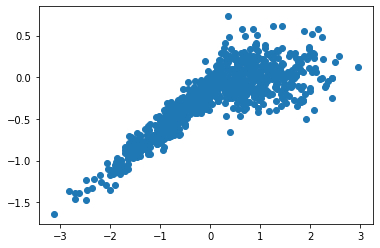

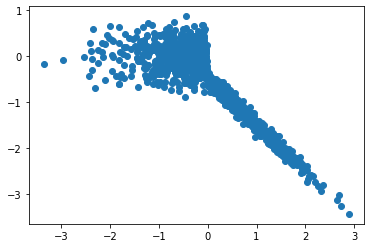

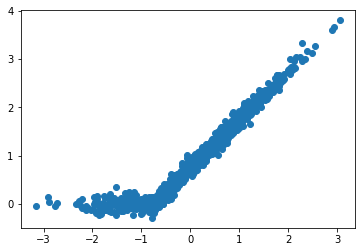

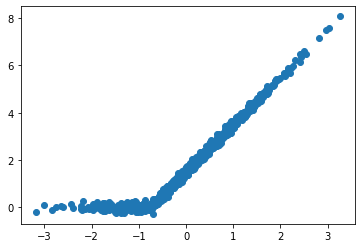

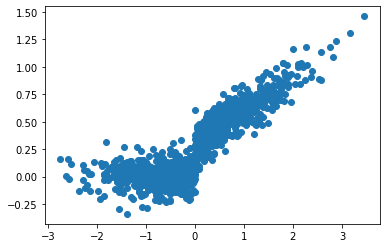

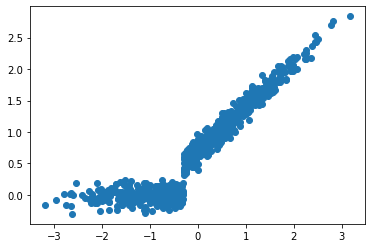

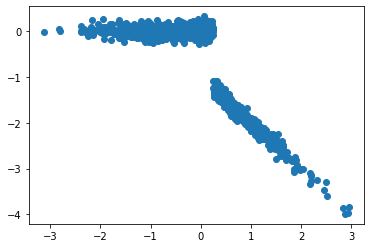

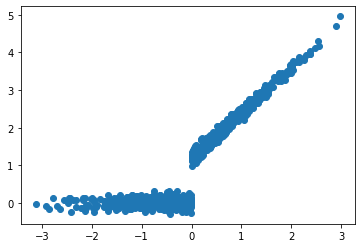

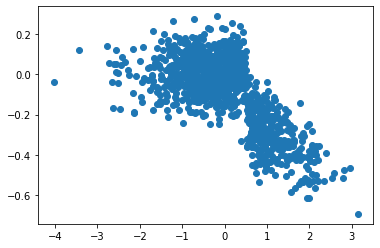

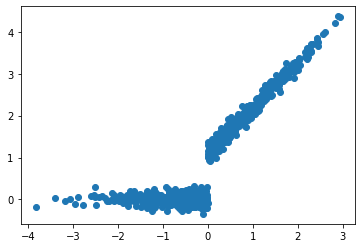

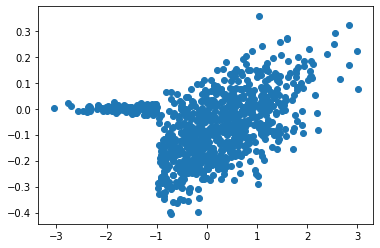

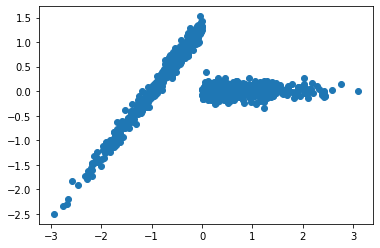

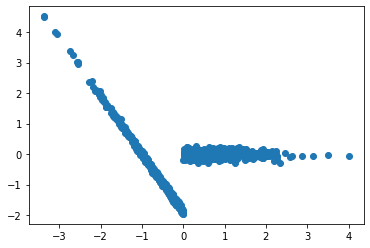

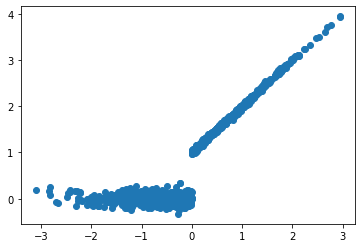

In [8]:
for i in range(0,14):
    plt.scatter(X[:,i], ys[i])
    plt.show()

In [9]:
y_test, ytests = calculate(X_test)
y_test_sc = StandardScaler()
y_test_std = y_sc.transform(y_test.reshape(-1,1))

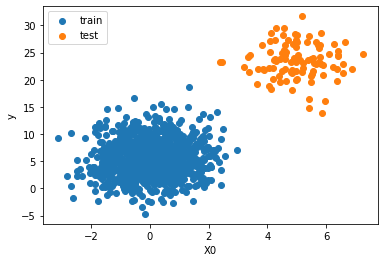

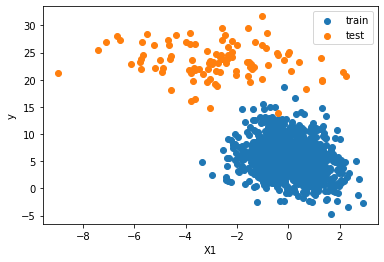

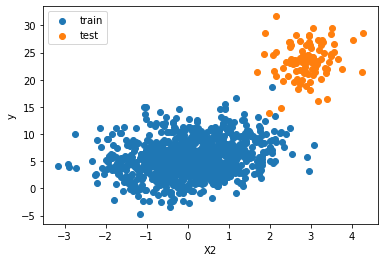

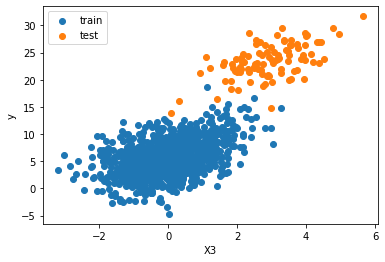

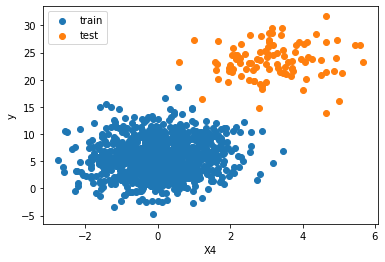

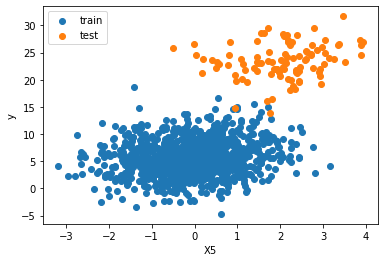

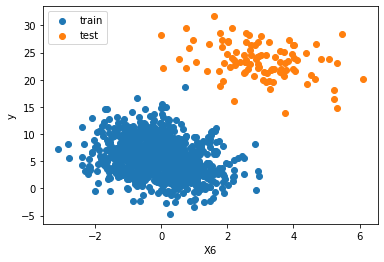

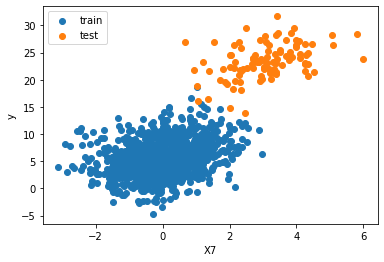

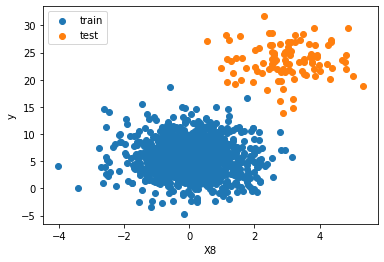

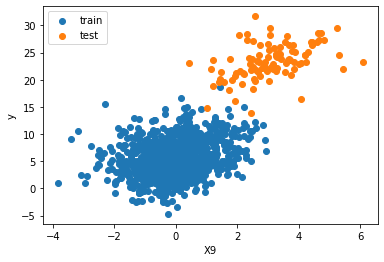

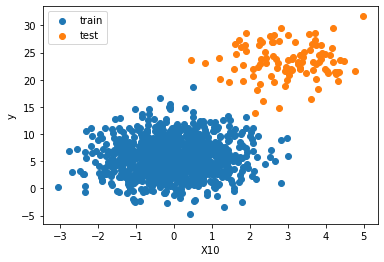

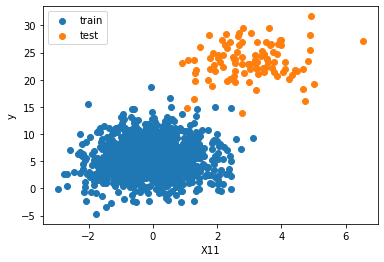

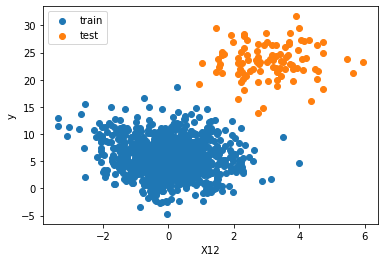

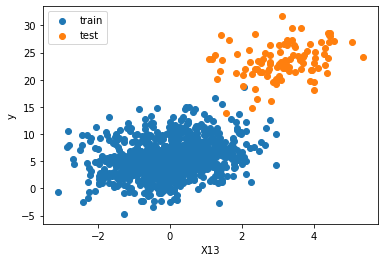

In [10]:
for i in range(0,14):
    plt.figure()
    plt.scatter(X[:,i],y, label="train")
    plt.scatter(X_test[:,i],y_test, label="test")
    plt.xlabel(f"X{i}")
    plt.ylabel("y")
    plt.legend()
    plt.show()


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor, LinearForestRegressor, LinearBoostRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression

In [12]:
rfr = RandomForestRegressor()
lr = LinearRegression()
ltr = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=5)
lfr = LinearForestRegressor(base_estimator=LinearRegression(), max_depth=5)
pls = PLSRegression()

In [13]:
# rfr.fit(X,y)
rfr_cv_pred = cross_val_predict(rfr,X_std,y_std)
rfr_cv_pred

r2 = r2_score(y_std,rfr_cv_pred)
print(r2)

rfr.fit(X_std,y_std)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7131227880229889


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [14]:
lr_cv_pred = cross_val_predict(lr,X_std,y_std)
lr_cv_pred

r2 = r2_score(y_std,lr_cv_pred)
print(r2)

lr.fit(X_std,y_std)

0.7303831437435668


LinearRegression()

In [15]:
ltr_cv_pred = cross_val_predict(ltr,X_std,y_std)
ltr_cv_pred

r2 = r2_score(y_std,ltr_cv_pred)
print(r2)

ltr.fit(X_std,y_std)

0.8136072925638393


LinearTreeRegressor(base_estimator=LinearRegression())

In [16]:
lfr_cv_pred = cross_val_predict(lfr,X_std,y_std)
lfr_cv_pred

r2 = r2_score(y_std,lfr_cv_pred)
print(r2)

lfr.fit(X_std,y_std)

0.8356913922105408


LinearForestRegressor(base_estimator=LinearRegression(), max_depth=5)

In [17]:
pls_cv_pred = cross_val_predict(pls,X_std,y_std)
pls_cv_pred

r2 = r2_score(y_std,pls_cv_pred)
print(r2)

pls.fit(X_std,y_std)

0.7301136562948436


PLSRegression()

In [18]:
# test

-14.972031663608012


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


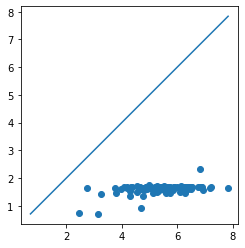

In [19]:
y_test_pred = rfr.predict(X_test_std)
r2_test = r2_score(y_test_std, y_test_pred)
print(r2_test)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_test_std, y_test_pred)
y_max = max(max(y_test_std), max(y_test_pred))
y_min = min(min(y_test_std), min(y_test_pred))
plt.plot([y_min, y_max], [y_min, y_max])
ax.set_aspect("equal", adjustable="box")
plt.show()

0.38157972340377866


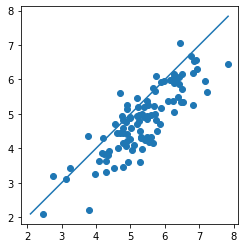

In [20]:
y_test_pred = lr.predict(X_test_std)
r2_test = r2_score(y_test_std, y_test_pred)
print(r2_test)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_test_std, y_test_pred)
y_max = max(max(y_test_std), max(y_test_pred))
y_min = min(min(y_test_std), min(y_test_pred))
plt.plot([y_min, y_max], [y_min, y_max])
ax.set_aspect("equal", adjustable="box")
plt.show()

0.1424835491176768


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


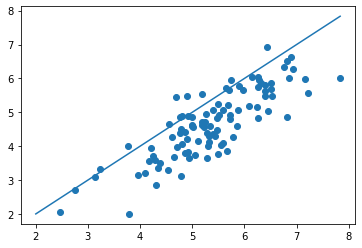

In [21]:
y_test_pred = ltr.predict(X_test_std)
r2_test = r2_score(y_test_std, y_test_pred)
print(r2_test)

plt.scatter(y_test_std, y_test_pred)
y_max = max(max(y_test_std), max(y_test_pred))
y_min = min(min(y_test_std), min(y_test_pred))
plt.plot([y_min, y_max], [y_min, y_max])
ax.set_aspect("equal", adjustable="box")
plt.show()

In [22]:
y_test_pred = lfr.predict(X_test_std)
r2_test = r2_score(y_test_std, y_test_pred)
print(r2_test)

0.37456789963353576


In [23]:
y_test_pred = pls.predict(X_test_std)
r2_test = r2_score(y_test_std, y_test_pred)
print(r2_test)

0.39839165724575143


In [24]:
# rfr.fit(X,y)
lsr = LinearSHAPRegressor()
lsr_cv_pred = cross_val_predict(LinearSHAPRegressor(),X_std,y_std)
lsr_cv_pred

r2 = r2_score(y_std,lsr_cv_pred)
print(r2)

#rfr.fit(X_std,y_std)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6543708010681595


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8105746612840015


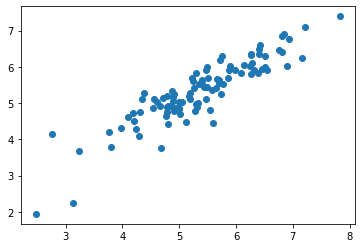

In [25]:
model = LinearSHAPRegressor()
model.fit(X_std,y_std)
y_pred_std = model.predict(X_test_std)
r2 = r2_score(y_test_std, y_pred_std) 
print(r2)
plt.scatter(y_test_std, y_pred_std)

In [26]:
explainer = shap.TreeExplainer(model=rfr)

In [27]:
shap_values = explainer.shap_values(X=X_std)

In [28]:
shap_values_test = explainer.shap_values(X=X_test_std)

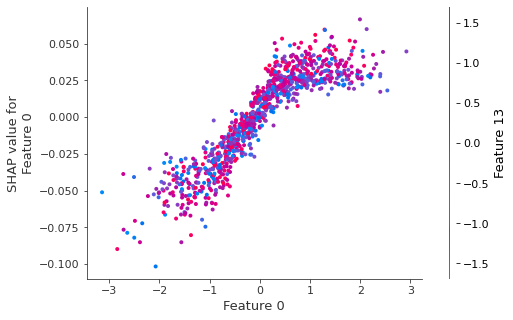

In [29]:
shap.dependence_plot(ind=0, shap_values=shap_values, features=X_std)

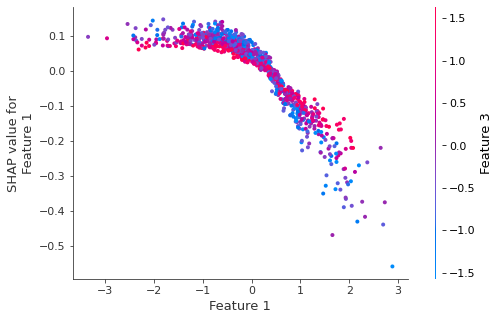

In [30]:
shap.dependence_plot(ind=1, shap_values=shap_values, features=X)

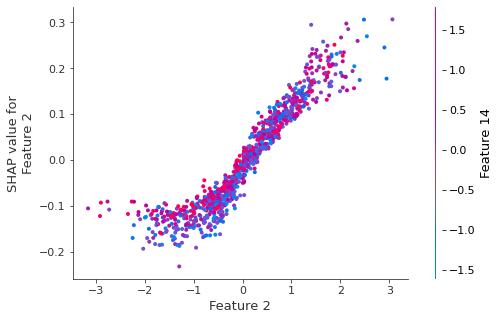

In [31]:
shap.dependence_plot(ind=2, shap_values=shap_values, features=X)

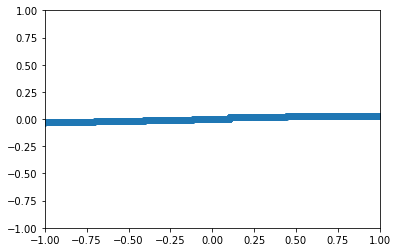

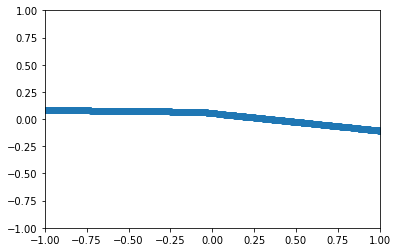

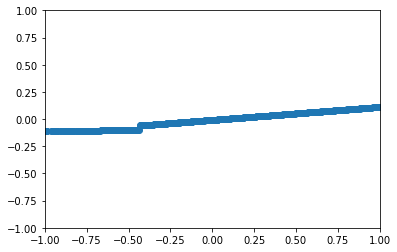

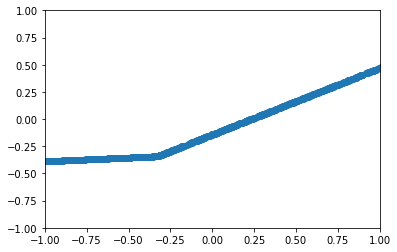

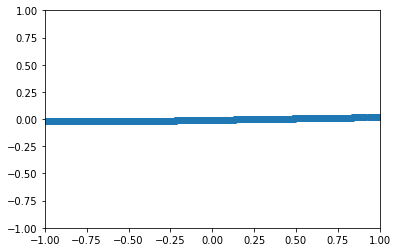

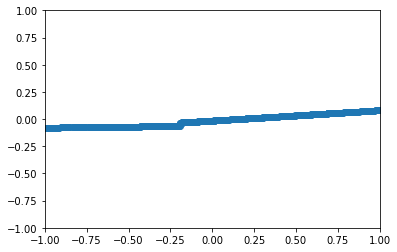

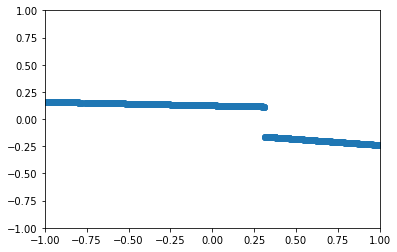

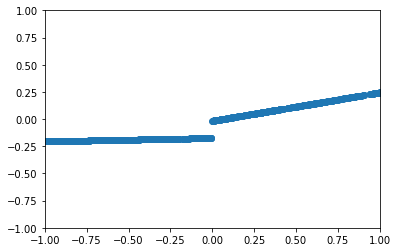

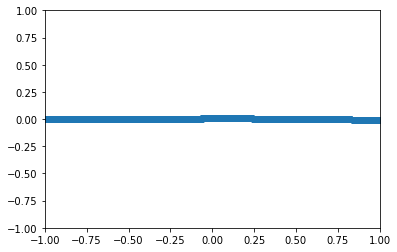

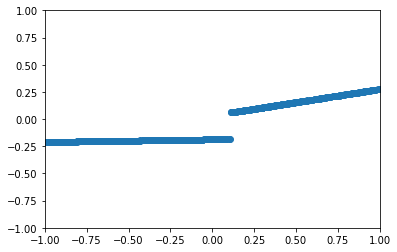

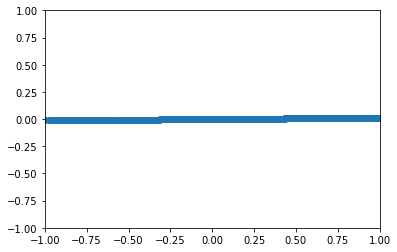

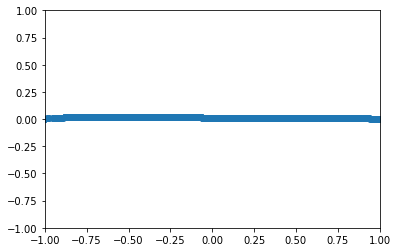

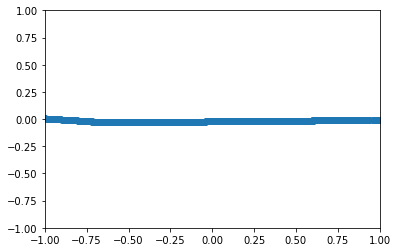

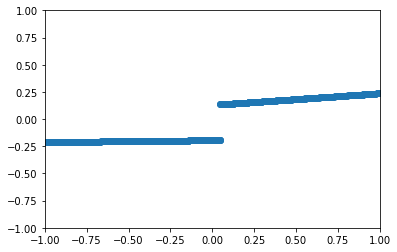

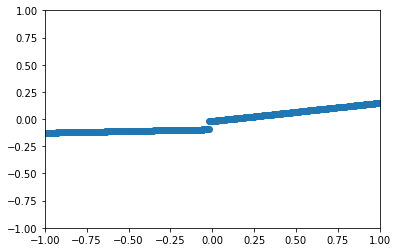

[LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1), LinearTreeRegressor(base_estimato

In [32]:
models = []

for each_X, shap_value in zip(X_std.T,shap_values.T):
    each_X = each_X.reshape(-1,1)
    
    each_ltr = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=1)
    each_ltr.fit(each_X, shap_value)
    models.append(each_ltr)
    
    shap_pred = each_ltr.predict(each_X)
    plt.scatter(each_X, shap_pred)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.show()
    

print(models)
print(len(models))

In [33]:
y_pred = models[0].predict(X_test_std[:,0].reshape(-1,1)) \
       + models[1].predict(X_test_std[:,1].reshape(-1,1)) \
       + models[2].predict(X_test_std[:,2].reshape(-1,1)) \
       + models[3].predict(X_test_std[:,3].reshape(-1,1)) \
       + models[4].predict(X_test_std[:,4].reshape(-1,1)) \
       + models[5].predict(X_test_std[:,5].reshape(-1,1)) \
       + models[6].predict(X_test_std[:,6].reshape(-1,1)) \
       + models[7].predict(X_test_std[:,7].reshape(-1,1)) \
       + models[8].predict(X_test_std[:,8].reshape(-1,1)) \
       + models[9].predict(X_test_std[:,9].reshape(-1,1)) \
       + models[10].predict(X_test_std[:,10].reshape(-1,1)) \
       + models[11].predict(X_test_std[:,11].reshape(-1,1)) \
       + models[12].predict(X_test_std[:,12].reshape(-1,1)) \
       + models[13].predict(X_test_std[:,13].reshape(-1,1)) \
       + models[14].predict(X_test_std[:,14].reshape(-1,1)) \
       + shap_values_test.sum(axis=1)
     

r2_ = r2_score(y_test_std, y_pred)
print(r2_)

0.801780041392085


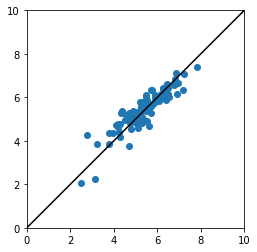

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_test_std, y_pred)
plt.plot([0,50],[0,50],color="black")
plt.xlim(0,10)
plt.ylim(0,10)
plt.xticks([0,2,4,6,8,10])
plt.yticks([0,2,4,6,8,10])

ax.set_aspect("equal", adjustable="box")
plt.show()

In [35]:
print((y_test_std.mean()) - (y_pred.mean()))

-0.06915740076037835


In [36]:
base_values = explainer(X_test_std).base_values

In [37]:
explainer.expected_value

array([0.00642886])

In [38]:
base_values_original = explainer(X_std).base_values

In [40]:
shap_values_test[0].sum()

1.6576075722166914